In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import wandb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from NN import Classification
from Utils import *
import plotly.figure_factory as ff

c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\madhe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Importing data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=0.8)

labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#TODO: Remove the wandb key before sharing
wandb.login(key = "39e4e3cb3e968e93d443865e4c84210177e9ada5")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: madhes23. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\madhe/.netrc


True

# Plotting sample data from each class

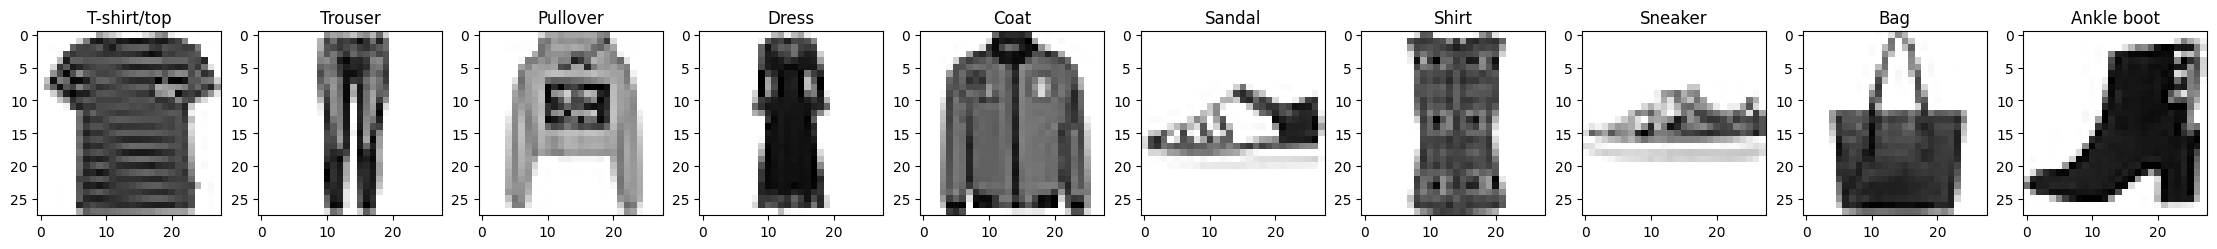

In [3]:
wandb.init(project='CS6910_Assignment-1', name='plotting-samples')

no_of_items = 10

fig, axes = plt.subplots(nrows = 1, ncols=10, figsize = (28, 28))
sample_images = []
for item in range(no_of_items):
  index = 0
  while(y_train[index] != item): #searching for the first occurance of the element
    index = index+1
  
  sample_images.append(wandb.Image(x_train[index], caption= labels[item]))

  ax = axes[item]
  ax.imshow(x_train[index], cmap='gray_r')
  ax.set_title(labels[item])

wandb.log({"Sample images from each class": sample_images})
wandb.finish()

# Reshaping for NN

In [3]:
no_of_pixels = x_train[0].size
x_train = x_train.reshape(-1, no_of_pixels)/255
x_test = x_test.reshape(-1, no_of_pixels)/255
x_validation = x_validation.reshape(-1, no_of_pixels)/255

# Models

### Model giving best accuracy in validation set

In [7]:
model_best = Classification() 
model_best.init_weight_and_bias()
tr_err, val_err, tr_acc, val_acc = model_best.fit(x_train, y_train, x_validation, y_validation)

Completed epoch : 1 	 Error: 0.5497226551149234 	 Accuracy: 0.8556875
Completed epoch : 2 	 Error: 0.4029718292903157 	 Accuracy: 0.8724375
Completed epoch : 3 	 Error: 0.37146515976336963 	 Accuracy: 0.8813958333333334
Completed epoch : 4 	 Error: 0.35150731957621545 	 Accuracy: 0.8875208333333333
Completed epoch : 5 	 Error: 0.3365502213776438 	 Accuracy: 0.8917708333333333
Completed epoch : 6 	 Error: 0.3244005287426372 	 Accuracy: 0.8960208333333334
Completed epoch : 7 	 Error: 0.31420806021984066 	 Accuracy: 0.8991458333333333
Completed epoch : 8 	 Error: 0.3053450163242655 	 Accuracy: 0.9022291666666666
Completed epoch : 9 	 Error: 0.29755971230317974 	 Accuracy: 0.9051041666666667
Completed epoch : 10 	 Error: 0.29071513934852106 	 Accuracy: 0.9072291666666666
Completed epoch : 11 	 Error: 0.28450883064597465 	 Accuracy: 0.9096666666666666
Completed epoch : 12 	 Error: 0.2787307860707826 	 Accuracy: 0.9118125
Completed epoch : 13 	 Error: 0.2734529871312372 	 Accuracy: 0.91325
C

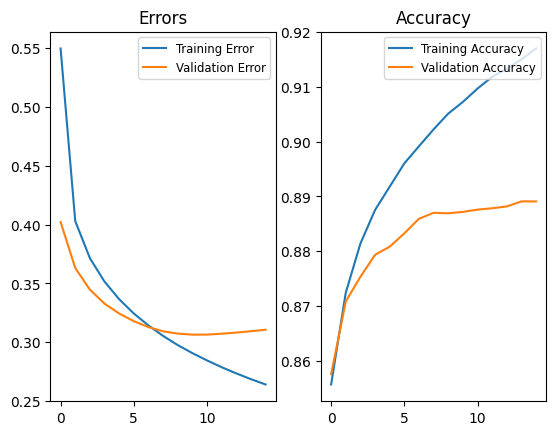

In [8]:
fig = model_best.plot_graphs(tr_err, val_err, tr_acc, val_acc)
wandb.init(project='CS6910_Assignment-1', name = 'best_model')
wandb.log({"Error and Accuracy" : wandb.Image(fig)})
wandb.finish()

### Accuracy in the test data

In [10]:
model_best.calc_accuracy(x_test, y_test)

0.8764

# Logging confusion matrix to WandB

In [11]:
predicted_dist = model_best.calc_accuracy(x_test, y_test, return_predicted_distribution=True)
true_values = predicted_dist.argmax(axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=true_values)
colorscale = [[0, 'rgb(255,255,255)'], 
              [0.2, 'rgb(255,0,0)'],
              [0.7, 'rgb(0,128,0)'],
              [1, 'rgb(0,128,0)']]
fig = ff.create_annotated_heatmap(conf_matrix, x=labels, y=labels, colorscale=colorscale)
fig.update_layout(title_text='Confusion matrix')
fig['data'][0]['showscale'] = True
fig.show()

#TODO: uncomment this
# wandb.init(project='CS6910_Assignment-1', name='confusion-matrix-plot-final')
# wandb.log({'confusion_matrix': fig})
# wandb.finish()

# MSE vs Cross Entropy

In [9]:
model_ce = Classification()
model_ce.init_weight_and_bias()
ce_tr_err, ce_val_err, ce_tr_acc, ce_val_acc = model_ce.fit(x_train, y_train, x_validation, y_validation)

Completed epoch : 1 	 Error: 0.547732224408357 	 Accuracy: 0.8562291666666667
Completed epoch : 2 	 Error: 0.40109085296805697 	 Accuracy: 0.8725
Completed epoch : 3 	 Error: 0.3701687045948189 	 Accuracy: 0.8797708333333333
Completed epoch : 4 	 Error: 0.3502454029269293 	 Accuracy: 0.8862916666666667
Completed epoch : 5 	 Error: 0.335333742939571 	 Accuracy: 0.8903333333333333
Completed epoch : 6 	 Error: 0.32318541808734336 	 Accuracy: 0.8935208333333333
Completed epoch : 7 	 Error: 0.3129384557429823 	 Accuracy: 0.8971666666666667
Completed epoch : 8 	 Error: 0.30411799472987683 	 Accuracy: 0.8999583333333333
Completed epoch : 9 	 Error: 0.2964178595971401 	 Accuracy: 0.9029791666666667
Completed epoch : 10 	 Error: 0.2896530553196268 	 Accuracy: 0.9059375
Completed epoch : 11 	 Error: 0.28363476401817084 	 Accuracy: 0.9085416666666667
Completed epoch : 12 	 Error: 0.278235622771282 	 Accuracy: 0.9107083333333333
Completed epoch : 13 	 Error: 0.27331430062323725 	 Accuracy: 0.91306

In [10]:
model_mse = Classification(_error_calculation = ErrorCalculationMethod.MEAN_SQUARE_ERROR)
model_mse.init_weight_and_bias()
mse_tr_err, mse_val_err, mse_tr_acc, mse_val_acc = model_mse.fit(x_train, y_train, x_validation, y_validation)

Completed epoch : 1 	 Error: 0.2765164599181039 	 Accuracy: 0.85875
Completed epoch : 2 	 Error: 0.2095146900765663 	 Accuracy: 0.8736875
Completed epoch : 3 	 Error: 0.1951134701610608 	 Accuracy: 0.8815416666666667
Completed epoch : 4 	 Error: 0.18627215801529154 	 Accuracy: 0.8873333333333333
Completed epoch : 5 	 Error: 0.17978180791494078 	 Accuracy: 0.8925416666666667
Completed epoch : 6 	 Error: 0.17476738333979244 	 Accuracy: 0.8965
Completed epoch : 7 	 Error: 0.1708391334813188 	 Accuracy: 0.8993125
Completed epoch : 8 	 Error: 0.16776505151238671 	 Accuracy: 0.9015625
Completed epoch : 9 	 Error: 0.16524303366879098 	 Accuracy: 0.9043541666666667
Completed epoch : 10 	 Error: 0.1630903056778499 	 Accuracy: 0.9072291666666666
Completed epoch : 11 	 Error: 0.16120252174857216 	 Accuracy: 0.9098333333333334
Completed epoch : 12 	 Error: 0.15948673627099888 	 Accuracy: 0.9119583333333333
Completed epoch : 13 	 Error: 0.15791705807107256 	 Accuracy: 0.9148333333333334
Completed e

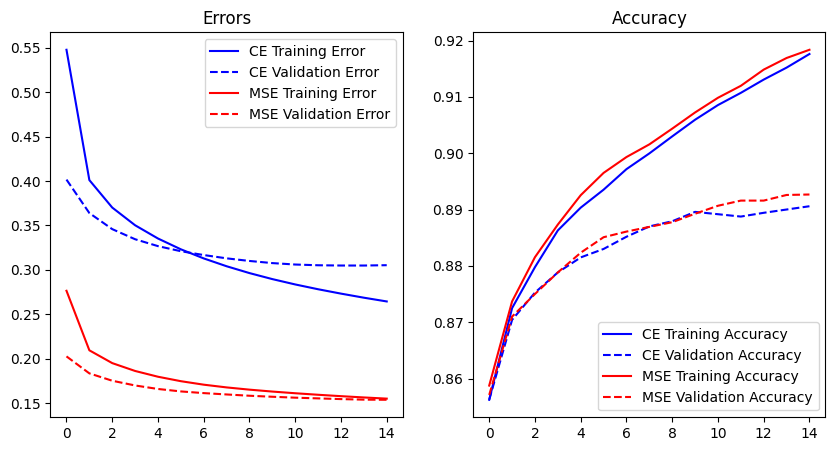

In [11]:
x_values = np.arange(len(ce_tr_acc))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.plot(x_values, ce_tr_err, label = "CE Training Error", color = 'blue')
ax1.plot(x_values, ce_val_err, label = "CE Validation Error", color= 'blue', linestyle = 'dashed')
ax1.plot(x_values, mse_tr_err, label = "MSE Training Error", color = 'red')
ax1.plot(x_values, mse_val_err, label = "MSE Validation Error", color = 'red', linestyle = 'dashed')
ax1.set_title("Errors")
ax1.legend()
ax2.plot(x_values, ce_tr_acc, label = "CE Training Accuracy", color = 'blue')
ax2.plot(x_values, ce_val_acc, label = "CE Validation Accuracy", color= 'blue', linestyle = 'dashed')
ax2.plot(x_values, mse_tr_acc, label = "MSE Training Accuracy", color = 'red')
ax2.plot(x_values, mse_val_acc, label = "MSE Validation Accuracy", color = 'red', linestyle = 'dashed')
ax2.set_title("Accuracy")
ax2.legend()

wandb.init(project="CS6910_Assignment-1", name = "mse_vs_ce")
wandb.log({"mse vs ce": wandb.Image(fig)})
wandb.finish()

plt.show()